# <font color='blue'>UNINOVE - Ciência de Dados</font>

## Tópico 16 - Python: Utiizando Pandas para Análise de Dados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


### Leitura e visualização dos dados

In [2]:
# importando bibliotecas
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

/tmp/ipykernel_50224/922792904.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


https://docs.python.org/3.9/library/datetime.html#strftime-and-strptime-behavior

In [3]:
# parser responsável por tratar uma string como uma data válida
def parser(x):
    return datetime.strptime('20'+x, '%Y-%m')

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [4]:
# lendo arquivo csv
serie = read_csv('topico16/serietemporal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

<AxesSubplot:xlabel='Month'>

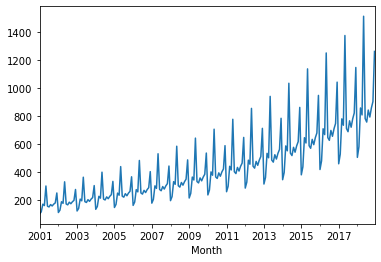

In [5]:
# gráfico
serie.plot()

Suponha que você não queira ver graficamente os 18 anos de dados gerados (de 2001 a 2018), mas de apenas uma parte menor para ter uma melhor visualização.

In [6]:
# importando bibliotecas
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

/tmp/ipykernel_50224/922792904.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<AxesSubplot:xlabel='Month'>

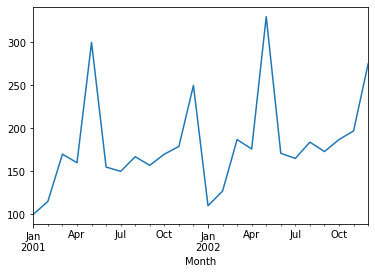

In [7]:
# tratando datas
def parser(x):
    return datetime.strptime('20'+x, '%Y-%m')

# lendo arquivo csv
serie = read_csv('topico16/serietemporal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# apresentando apenas parte dos dados
serie.truncate(before="2001-01", after="2002-12").plot()

### Análise de Série Temporal e Predição de dados

<b>statsmodels</b> é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados estatísticos.

https://www.statsmodels.org/stable/api.html?highlight=statsmodels%20api

In [8]:
# importar bibliotecas
from pandas import read_csv
from pandas import datetime
import statsmodels.api as sm

/tmp/ipykernel_50224/2545148694.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [9]:
# tratando datas
def parser(x):
    return datetime.strptime('20'+x, '%Y-%m')

# lendo arquivo csv
serie = read_csv('topico16/serietemporal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

carregar a variável <i>treino</i> com os valores que foram carregados a partir do arquivo <i>serietemporal.csv</i>

In [10]:
treino = serie.values

Criada a variável <i>comparacao</i> onde a mesma é uma cópia da variável <i>treino</i>, a partir do índice 120 até seu final. Se considerarmos índice 120 e considerando que cada ano possui 12 meses (ou 12 índices), temos que a variável <i>comparacao</i> possui dados a partir de janeiro de 2011 (120 meses após a data inicial, janeiro de 2001).

In [11]:
comparacao = treino[120:len(treino)]

Utilizado o pacote <b>statsmodels</b>. Note que foi usada a função <b>SARIMAX</b>, que trata da sazonalidade da série temporal. Ele se utiliza do modelo <b>ARIMA</b>, modelo muito utilizado para tratamento e predição de séries temporais.

In [12]:
modelo = sm.tsa.statespace.SARIMAX(treino, order=(2,1,1), seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
modelo_fit = modelo.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31437D+00    |proj g|=  3.58962D-01

At iterate    5    f=  2.94108D+00    |proj g|=  6.46601D-01

At iterate   10    f=  1.75558D+00    |proj g|=  1.55888D+00

At iterate   15    f=  1.42960D+00    |proj g|=  2.57668D+00

At iterate   20    f=  8.44006D-01    |proj g|=  2.61686D+00

At iterate   25    f=  7.42029D-01    |proj g|=  6.92013D-01

At iterate   30    f=  5.49742D-01    |proj g|=  7.27200D-02

At iterate   35    f=  5.39105D-01    |proj g|=  2.72921D+00

At iterate   40    f=  5.38741D-01    |proj g|=  1.22929D-01

At iterate   45    f=  5.38646D-01    |proj g|=  1.01019D+00

At iterate   50    f=  5.37934D-01    |proj g|=  8.84937D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Imprimimos o erro obtido. Quando menor o valor mais próximo e mais preciso estamos da série temporal analisada.

In [13]:
print(modelo_fit.aic)

244.3875087897307


Em seguida atribuimos ao índice inicial o valor de 12*10 (120), que corresponde a data de janeiro de 2011. Ao índice final foi atribuído o valor 12*18 (que corresponde a data de dezembro de 2018).  A variável <i>i</i> foi atribuído o valor 0.

In [14]:
indice_inicial = 12 * 10
indice_final = 12 * 18
i = 0

A variável <i>forecast</i> foi carregada com a previsão de janeiro de 2011 a dezembro de 2018, baseado na análise da série temporal que foi feita.

In [15]:
forecast = modelo_fit.predict(start=indice_inicial, end=indice_final)

Estamos comparando os valores reais, presentes no arquivo <i>serietemporal.csv</i> com os dados que foram previstos baseado na análise temporal realizada (função SARIMAX).

Note que as diferenças não mínimas, a análise de série temporal se mostrou bastante eficiente neste exemplo.

In [16]:
for t in range(len(comparacao)):
    predito = forecast[i]
    esperado = comparacao[t]
    print('predito=%f, esperado=%f' % (predito, esperado))
    i = i + 1

predito=259.474921, esperado=259.000000
predito=297.882691, esperado=298.000000
predito=440.985592, esperado=441.000000
predito=414.592369, esperado=415.000000
predito=777.652778, esperado=778.000000
predito=401.469083, esperado=402.000000
predito=389.481526, esperado=389.000000
predito=433.423750, esperado=433.000000
predito=406.834677, esperado=407.000000
predito=441.037152, esperado=441.000000
predito=464.144491, esperado=464.000000
predito=647.772488, esperado=648.000000
predito=284.812305, esperado=285.000000
predito=327.760076, esperado=328.000000
predito=485.121023, esperado=485.000000
predito=456.487095, esperado=456.000000
predito=855.713173, esperado=856.000000
predito=442.107957, esperado=442.000000
predito=427.834213, esperado=428.000000
predito=476.233775, esperado=476.000000
predito=447.619059, esperado=448.000000
predito=485.075265, esperado=485.000000
predito=510.368265, esperado=511.000000
predito=712.788562, esperado=713.000000
predito=313.554669, esperado=314.000000


Agora faremos uma análise futura, de dados que não se encontram no arquivo <i>serietemporal.csv</i>. Vamos analisar o ano de 2019, desde janeiro até dezembro de 2019 (Note que a diferença entre índice inicial e índice final é igual a 12).

In [17]:
indice_inicial = 12 * 18
indice_final = 12 * 19
i = 0

Predição feita para o ano de 2019, baseado nos dados de janeiro de 2001 e dezembro de 2018.

In [18]:
forecast = modelo_fit.predict(start=indice_inicial, end=indice_final)
for i in range(12):
    valorpredito = forecast[i]
    print('Valor Predito=%f' % (valorpredito) )

Valor Predito=555.428010
Valor Predito=639.077632
Valor Predito=944.880560
Valor Predito=889.924390
Valor Predito=1667.630146
Valor Predito=861.274384
Valor Predito=833.766468
Valor Predito=928.396002
Valor Predito=873.423441
Valor Predito=944.884980
Valor Predito=995.511617
Valor Predito=1390.455413


### SARIMAX - order e seasonal_order

In [19]:
# importar bibliotecas
from pandas import read_csv
from pandas import datetime
import statsmodels.api as sm

/tmp/ipykernel_50224/2545148694.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [20]:
# tratando datas
def parser(x):
    return datetime.strptime('20'+x, '%Y-%m')

# lendo arquivo csv
serie = read_csv('topico16/serietemporal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

O programa varia todas as variáveis possíveis tanto de <i>order</i> quanto de <i>seasonal_order</i> entre 0s e 1s. Para cada grupo de valores faz o cálculo do AIC.

Quanto menor o AIC mais precisa é a série temporal. Ao final do programa ele mostra o menor AIC, como também os valores das variáveis <i>order</i> e <i>seasonal_order</i> que chegaram ao menor AIC.

In [21]:
# carrega valores do arquivo
X = serie.values
tamanhototal = int(len(X) * 1)
treino = X[0:tamanhototal]
menorvalor = 999999999
 
for p1 in range(0,2):
    for d1 in range(0,2):
        for q1 in range(0,2):
            for p2 in range(0,2):
                for d2 in range(0,2):
                    for q2 in range(0,2):
                        param = (p1,d1,q1)
                        param_seasonal = (p2,d2,q2,12)
                        mod = sm.tsa.statespace.SARIMAX(treino,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
                        results = mod.fit()
                        print("Order:",param,"Seasonal Order:", param_seasonal,"AIC:", results.aic)
                        if (results.aic<menorvalor):
                            menorvalor = results.aic
                            melhorordem = param
                            melhorordemsazonal = param_seasonal

print(menorvalor)
print(melhorordem)
print(melhorordemsazonal)

 This problem is unconstrained.
 This problem is unconstrained.
/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61480D+00    |proj g|=  8.77183D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.772D-06   7.615D+00
  F =   7.6147958795478710     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (0, 0, 0) Seasonal Order: (0, 0, 0, 12) AIC: 3291.5918199646803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96074D+00    |proj g|=  1.30498D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   6.380D-07   4.960D+00
  F =   4.9598264615094569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (0, 0, 0) Seasonal Order: (0, 1, 0, 12) AIC: 2144.645031372085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  5.43426D-01    |proj g|=  8.90449D-02

At iterate   20    f=  5.43399D-01    |proj g|=  1.76977D+00

At iterate   25    f=  5.42082D-01    |proj g|=  1.04818D+01

At iterate   30    f=  5.41450D-01    |proj g|=  1.80461D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     37      1     0     0   1.627D-05   5.414D-01
  F =  0.54144993313592438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 0, 0) Seasonal Order: (1, 1, 1, 12) AIC: 239.90637111471935
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.83613D+00    |proj g|=  1.16816D-01

At iterate   10    f=  6.83410D+00    |proj g|=  3.73390D-03

At iterate   15    f=  6.83390D+00    |proj g|=  9.85876D-02

At iterate   20    f=  6.79820D+00    |proj g|=  1.94343D+00

At iterate   25    f=  6.41781D+00    |proj g|=  1.97481D+00

At iterate   30    f=  6.25521D+00    |proj g|=  6.00297D-02

At iterate   35    f=  6.25487D+00    |proj g|=  1.06552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     65      1     0     0   2.103D-06   6.255D+00
  F =   6.2548666670718127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.27155D+00    |proj g|=  7.26039D-02

At iterate   10    f=  4.26696D+00    |proj g|=  3.37546D-02

At iterate   15    f=  4.15171D+00    |proj g|=  1.90271D-01

At iterate   20    f=  3.78719D+00    |proj g|=  3.00398D-01

At iterate   25    f=  3.78265D+00    |proj g|=  1.05551D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     51      1     0     0   9.626D-06   3.783D+00
  F =   3.7826490484672322     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (0, 0, 1) Seasonal Order: (0, 1, 1, 12) AIC: 1640.1043889378443
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.



At iterate   30    f=  9.90469D-01    |proj g|=  3.35455D+01

At iterate   35    f=  5.96514D-01    |proj g|=  6.18723D-01

At iterate   40    f=  4.94969D-01    |proj g|=  2.40913D+01

At iterate   45    f=  4.68792D-01    |proj g|=  4.05561D+00

At iterate   50    f=  4.63034D-01    |proj g|=  4.89407D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50    112      1     0     0   4.894D+00   4.630D-01
  F =  0.46303355558998771     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Order: (0, 0, 1) Seasonal Order: (1, 0, 0, 12) AIC: 206.0304960148747
RUNNING THE L-BFGS-B CODE

           * * *

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   25    f=  5.57682D+00    |proj g|=  5.33967D-01

At iterate   30    f=  3.57707D+00    |proj g|=  7.34660D+00

At iterate   35    f=  2.25469D+00    |proj g|=  1.47514D+01

At iterate   40    f=  9.12310D-01    |proj g|=  1.04882D+01

At iterate   45    f=  4.22299D-01    |proj g|=  8.83179D+01

At iterate   50    f=  2.77427D-01    |proj g|=  4.85531D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    119      1     0     0   4.855D+00   2.774D-01
  F =  0.27742724676100711     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Order: (0, 0, 1) Seasonal Order: (1, 0, 1, 12) AIC:

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  1.25172D+00    |proj g|=  1.19690D+00

At iterate   15    f=  9.50811D-01    |proj g|=  1.08734D+01

At iterate   20    f=  9.23290D-01    |proj g|=  4.26500D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     64      1     0     0   8.014D-05   9.233D-01
  F =  0.92328969496881019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 0, 1) Seasonal Order: (1, 1, 0, 12) AIC: 404.861148226526
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.



At iterate   10    f=  1.73234D+00    |proj g|=  6.96854D+00

At iterate   15    f=  8.44615D-01    |proj g|=  7.51068D+00

At iterate   20    f=  6.11007D-01    |proj g|=  3.45265D+01

At iterate   25    f=  5.34090D-01    |proj g|=  9.00624D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     74      1     0     0   3.223D-01   5.257D-01
  F =  0.52566298883797902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 0, 1) Seasonal Order: (1, 1, 1, 12) AIC: 235.08641117800693
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =    

 This problem is unconstrained.
 This problem is unconstrained.
/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


Order: (0, 1, 0) Seasonal Order: (0, 0, 1, 12) AIC: 2749.624311993176
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10654D+00    |proj g|=  3.43197D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   6.681D-06   4.105D+00
  F =   4.1054693067599688     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (0, 1, 0) Seasonal Order: (0, 1, 0, 12) AIC: 1775.5627405203065
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     23      1     0     0   2.906D+00   5.787D-01
  F =  0.57872889115220127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 1, 0) Seasonal Order: (1, 0, 1, 12) AIC: 256.01088097775096
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17978D+00    |proj g|=  1.71490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.54150D+00    |proj g|=  3.03486D-01

At iterate   30    f=  5.50545D+00    |proj g|=  8.94104D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     53      1     0     0   9.198D-06   5.505D+00
  F =   5.5054458330174567     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (0, 1, 1) Seasonal Order: (0, 0, 1, 12) AIC: 2384.3525998635414
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86899D+00    |proj g|=  2.94076D-01

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.09056D+00    |proj g|=  1.41016D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   1.179D-05   3.091D+00
  F =   3.0905262122307202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 1, 1) Seasonal Order: (0, 1, 1, 12) AIC: 1341.1073236836712
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72372D+00    |proj g|=  5.34194D-03

At iterate    5    f=  5.66018D+00    |proj g|=  2.17991D-01

 This problem is unconstrained.



At iterate   25    f=  4.78225D-01    |proj g|=  1.13629D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     81      1     1     0   1.136D-01   4.782D-01
  F =  0.47822462961955964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 1, 1) Seasonal Order: (1, 0, 0, 12) AIC: 212.59303999564978
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67711D+00    |proj g|=  4.59540D-02

At iterate    5    f=  5.66465D+00    |proj g|=  5.29943D-03


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.04397D+00    |proj g|=  5.14197D+01
  ys=-1.623E+00  -gs= 7.824E-01 BFGS update SKIPPED

At iterate   25    f=  2.85093D-01    |proj g|=  1.32772D+02

At iterate   30    f=  2.46108D-01    |proj g|=  3.97781D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     92      1     2     0   1.377D+01   2.460D-01
  F =  0.24601511982950258     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (0, 1, 1) Seasonal Order: (1, 0, 1, 12) AIC: 114.27853176634511
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.06536D+00    |proj g|=  6.93615D-01

At iterate   10    f=  1.51841D+00    |proj g|=  1.31867D+00

At iterate   15    f=  1.35512D+00    |proj g|=  1.29232D+00

At iterate   20    f=  1.26424D+00    |proj g|=  7.04340D-01

At iterate   25    f=  1.22452D+00    |proj g|=  2.73617D-01

At iterate   30    f=  1.20886D+00    |proj g|=  1.39187D+00

At iterate   35    f=  1.19898D+00    |proj g|=  9.47446D-01

At iterate   40    f=  1.19285D+00    |proj g|=  7.13317D-01

At iterate   45    f=  1.18839D+00    |proj g|=  1.82954D+00

At iterate   50    f=  1.18615D+00    |proj g|=  6.49539D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


Order: (0, 1, 1) Seasonal Order: (1, 1, 0, 12) AIC: 518.4175770886402
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31447D+00    |proj g|=  3.58968D-01

At iterate    5    f=  2.93466D+00    |proj g|=  1.03237D+00

At iterate   10    f=  1.60720D+00    |proj g|=  1.48679D+00

At iterate   15    f=  1.22904D+00    |proj g|=  8.66721D-01

At iterate   20    f=  1.12638D+00    |proj g|=  1.66362D-01

At iterate   25    f=  1.04314D+00    |proj g|=  2.27973D+00

At iterate   30    f=  9.92367D-01    |proj g|=  1.07863D+00

At iterate   35    f=  9.61439D-01    |proj g|=  1.20333D+00

At iterate   40    f=  9.45216D-01    |proj g|=  7.91281D-01

At iterate   45    f=  9.38243D-01    |proj g|=  4.81106D-01

At iterate   50    f=  9.34053D-01    |proj g|=  1.69633D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of fun

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.00599D+00    |proj g|=  3.09994D-02

At iterate   10    f=  5.88789D+00    |proj g|=  3.26674D-01

At iterate   15    f=  5.83696D+00    |proj g|=  5.41085D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     32      1     0     0   7.595D-06   5.837D+00
  F =   5.8369527409347981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (1, 0, 0) Seasonal Order: (0, 0, 1, 12) AIC: 2527.5635840838327
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88166D+00    |proj g|=  5.33125D-02

At iterate    5    f=  5.86792D+00    |proj g|=  4.57670D-03

At iterate   10    f=  5.69726D+00    |proj g|=  1.97144D+00
  ys=-5.071E-02  -gs= 7.381E-01 BFGS update SKIPPED

At iterate   15    f=  3.66576D+00    |proj g|=  1.54437D+01

At iterate   20    f=  1.25673D+00    |proj g|=  2.01142D+02

At iterate   25    f=  4.62395D-01    |proj g|=  2.74513D+00

At iterate   30    f=  4.34707D-01    |proj g|=  1.29012D+01

At iterate   35    f=  4.26205D-01    |proj g|=  3.19658D+01

At iterate   40    f=  4.25706D-01    |proj g|=  1.34092D+00

At iterate   45    f=  4.25412D-01    |proj g|=  1.79942D+01

At iterate   50    f=  4.14701D-01    |proj g|=  1.71762D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.38724D+00    |proj g|=  2.47622D+01

At iterate   10    f=  1.01078D+00    |proj g|=  6.02222D-01

At iterate   15    f=  9.52057D-01    |proj g|=  3.76206D+00

At iterate   20    f=  9.20048D-01    |proj g|=  1.43913D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     47      1     0     0   4.214D-04   9.200D-01
  F =  0.92004834072170538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (1, 0, 0) Seasonal Order: (1, 1, 0, 12) AIC: 403.4608831917767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =     

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  9.30057D-01    |proj g|=  1.00833D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     77      1     0     0   1.008D+00   9.301D-01
  F =  0.93005719751969662     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Order: (1, 0, 0) Seasonal Order: (1, 1, 1, 12) AIC: 409.78470932850894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48270D+00    |proj g|=  3.13462D-01

At iterate    5    f=  6.37445D+00    |proj g|=  3.10094D+00

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   30    f=  3.75189D+00    |proj g|=  6.68515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     61      1     0     0   6.924D-03   3.752D+00
  F =   3.7518919468853311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (1, 0, 1) Seasonal Order: (0, 1, 0, 12) AIC: 1626.817321054463
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79777D+00    |proj g|=  1.52013D-01
  ys=-3.999E-01  -gs= 6.974E-01 BFGS update SKIPPED

At iterate


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.71266D+00    |proj g|=  8.06780D-02

At iterate   10    f=  4.39027D+00    |proj g|=  2.19241D+01

At iterate   15    f=  9.55173D-01    |proj g|=  1.56931D+02

At iterate   20    f=  6.14526D-01    |proj g|=  4.62433D-01

At iterate   25    f=  4.58395D-01    |proj g|=  7.73679D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     87      1     0     0   1.874D-02   4.582D-01
  F =  0.45817298067702666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (1, 0, 1) Seasonal Order: (1, 0, 0, 12) AIC: 205.93072765247553
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.



At iterate    5    f=  5.70577D+00    |proj g|=  5.25410D-03

At iterate   10    f=  5.69294D+00    |proj g|=  6.58818D-02

At iterate   15    f=  5.65673D+00    |proj g|=  2.45983D-01
  ys=-2.860E-01  -gs= 3.424E-01 BFGS update SKIPPED

At iterate   20    f=  4.57211D+00    |proj g|=  5.67709D+01

At iterate   25    f=  2.54014D+00    |proj g|=  1.31071D+04

At iterate   30    f=  1.60858D+00    |proj g|=  2.56725D+02

At iterate   35    f=  1.29779D+00    |proj g|=  1.55929D+03

At iterate   40    f=  9.77112D-01    |proj g|=  8.81756D+02

At iterate   45    f=  3.37212D-01    |proj g|=  1.13774D+03

At iterate   50    f=  2.48050D-01    |proj g|=  7.92450D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  9.43453D-01    |proj g|=  6.31907D+00

At iterate   15    f=  9.19164D-01    |proj g|=  5.41126D-03

At iterate   20    f=  9.19164D-01    |proj g|=  7.70505D-03

At iterate   25    f=  9.19161D-01    |proj g|=  8.84489D-02

At iterate   30    f=  9.19157D-01    |proj g|=  6.40933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     52      1     0     0   6.409D-03   9.192D-01
  F =  0.91915743070805744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (1, 0, 1) Seasonal Order: (1, 1, 0, 12) AIC: 405.07601006588084
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.



At iterate    5    f=  2.15346D+00    |proj g|=  4.06730D+00

At iterate   10    f=  1.44198D+00    |proj g|=  1.70413D+00

At iterate   15    f=  1.23300D+00    |proj g|=  1.24080D+00

At iterate   20    f=  1.02693D+00    |proj g|=  4.32206D-01

At iterate   25    f=  9.80439D-01    |proj g|=  1.97346D+00

At iterate   30    f=  9.56916D-01    |proj g|=  1.52245D+00

At iterate   35    f=  9.41226D-01    |proj g|=  2.50866D+00

At iterate   40    f=  9.32472D-01    |proj g|=  1.45244D+00

At iterate   45    f=  9.30374D-01    |proj g|=  1.50238D+00

At iterate   50    f=  9.30132D-01    |proj g|=  2.33173D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.93072D+00    |proj g|=  3.34069D-03

At iterate   10    f=  5.92275D+00    |proj g|=  7.39993D-02

At iterate   15    f=  5.74421D+00    |proj g|=  1.89166D-01

At iterate   20    f=  5.70941D+00    |proj g|=  4.27177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     42      1     0     0   6.809D-06   5.709D+00
  F =   5.7094061124662696     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Order: (1, 1, 0) Seasonal Order: (0, 0, 1, 12) AIC: 2472.4634405854285
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.40696D+00    |proj g|=  1.42157D+02

At iterate   20    f=  1.83235D+00    |proj g|=  8.80090D+02

At iterate   25    f=  1.43389D+00    |proj g|=  2.55775D+00

At iterate   30    f=  1.42926D+00    |proj g|=  9.02876D+01

At iterate   35    f=  1.42627D+00    |proj g|=  1.62616D+00

At iterate   40    f=  1.42563D+00    |proj g|=  1.78791D+01

At iterate   45    f=  1.41605D+00    |proj g|=  5.67124D+01

At iterate   50    f=  8.60336D-01    |proj g|=  2.31802D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    103      1     0     0   2.318D+02   8.603D-01
  F =  0.860335891379

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.05534D+00    |proj g|=  5.14328D-01
  ys=-1.174E+00  -gs= 7.191E-01 BFGS update SKIPPED

At iterate   10    f=  1.13113D+00    |proj g|=  1.57212D+00

At iterate   15    f=  6.93347D-01    |proj g|=  2.71498D+00

At iterate   20    f=  6.65970D-01    |proj g|=  8.54072D-02

At iterate   25    f=  6.62924D-01    |proj g|=  4.94289D-02

At iterate   30    f=  6.62922D-01    |proj g|=  9.56253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     68      1     1     0   9.563D-04   6.629D-01
  F =  0.66292200192499895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.37835D+00    |proj g|=  6.62932D-03

At iterate   10    f=  6.37832D+00    |proj g|=  9.18428D-03

At iterate   15    f=  6.37691D+00    |proj g|=  1.10022D-01

At iterate   20    f=  6.36078D+00    |proj g|=  4.61240D-02

At iterate   25    f=  6.36044D+00    |proj g|=  1.45462D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     41      1     0     0   1.455D-05   6.360D+00
  F =   6.3604372113554746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (1, 1, 1) Seasonal Order: (0, 0, 0, 12) AIC: 2753.708875305565
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40782D+00    |proj g|=  1.37572D-01

At iterate    5    f=  3.37236D+00    |proj g|=  5.87340D-02

At iterate   10    f=  3.09834D+00    |proj g|=  1.99154D-01

At iterate   15    f=  3.08859D+00    |proj g|=  3.11415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   1.907D-05   3.089D+00
  F =   3.0885875392032074     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Order: (

 This problem is unconstrained.



At iterate    5    f=  5.68101D+00    |proj g|=  4.21646D-02

At iterate   10    f=  5.44023D+00    |proj g|=  1.43488D+00

At iterate   15    f=  3.59091D+00    |proj g|=  1.66606D+02

At iterate   20    f=  2.58682D+00    |proj g|=  2.82093D+00

At iterate   25    f=  2.37565D+00    |proj g|=  5.16707D+01

At iterate   30    f=  1.61706D+00    |proj g|=  2.23614D+00

At iterate   35    f=  9.41753D-01    |proj g|=  3.15400D+00

At iterate   40    f=  5.54504D-01    |proj g|=  2.26247D+00

At iterate   45    f=  5.14690D-01    |proj g|=  4.86969D+01

At iterate   50    f=  4.73800D-01    |proj g|=  7.87650D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  5.64097D+00    |proj g|=  3.81258D-02

At iterate   15    f=  5.61926D+00    |proj g|=  1.69780D-01

At iterate   20    f=  5.17043D+00    |proj g|=  9.05612D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  2.59318D+00    |proj g|=  2.55265D-01

At iterate   30    f=  1.96622D+00    |proj g|=  8.18285D+01

At iterate   35    f=  1.06272D+00    |proj g|=  8.07516D+01

At iterate   40    f=  8.51376D-01    |proj g|=  4.19942D+01

At iterate   45    f=  6.01838D-01    |proj g|=  1.68678D+02

At iterate   50    f=  3.07628D-01    |proj g|=  1.20170D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    117      2     0     0   1.202D+01   3.076D-01
  F =  0.30762837365731588     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


Order: (1, 1, 1) Seasonal Order: (1, 0, 1, 12) AIC: 142.89545741996045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27094D+00    |proj g|=  5.34849D-02

At iterate    5    f=  1.19713D+00    |proj g|=  6.12262D-01

At iterate   10    f=  9.62172D-01    |proj g|=  3.20170D+00

At iterate   15    f=  9.23926D-01    |proj g|=  3.67688D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     40      1     0     0   9.219D-06   9.238D-01
  F =  0.92376449931263027     

 This problem is unconstrained.



At iterate   10    f=  1.61445D+00    |proj g|=  8.44488D-01

At iterate   15    f=  1.19977D+00    |proj g|=  4.75392D+00

At iterate   20    f=  1.12725D+00    |proj g|=  4.98448D-01

At iterate   25    f=  1.09767D+00    |proj g|=  1.55221D-01

At iterate   30    f=  1.04607D+00    |proj g|=  3.45172D-01

At iterate   35    f=  9.90038D-01    |proj g|=  8.21642D-01

At iterate   40    f=  9.56843D-01    |proj g|=  1.03815D+00

At iterate   45    f=  9.42150D-01    |proj g|=  1.29404D+00

At iterate   50    f=  9.35260D-01    |proj g|=  2.15546D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     77   

/home/dirleif/bin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
